In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [4]:
df = pd.read_csv("losses.csv")

In [12]:
df.columns

Index(['model', 'loss', 'Replacement', 'Submodels', 'Voting', 'Ensemble',
       'Sessions', 'Trials'],
      dtype='object')

In [14]:
df.groupby(['Replacement', 'Submodels', 'Voting', 'Ensemble','Sessions', 'Trials']).agg({'loss':'mean'}).reset_index()
    

,Replacement,Submodels,Voting,Ensemble,Sessions,Trials,loss
0,FALSE,4,mean,average,256,200,0.600686
1,FALSE,4,median,average,32,50,0.615014
2,FALSE,4,median,average,32,100,0.624664
3,FALSE,4,median,average,32,200,0.622043
4,FALSE,4,median,average,64,50,0.589356
5,FALSE,4,median,average,64,100,0.599027
6,FALSE,4,median,average,64,200,0.620653
7,FALSE,4,median,average,128,50,0.632875
8,FALSE,4,median,average,128,100,0.589084
9,FALSE,4,median,average,128,200,0.592031


In [74]:
df.tail(60)

,model,loss,Replacement,Submodels,Voting,Ensemble,Sessions,Trials
280,model_name,0.597876,FALSE,4,median,average,128,50
281,model_name,0.597876,FALSE,4,median,average,128,50
282,model_name,0.597876,FALSE,4,median,average,128,50
283,model_name,0.597876,FALSE,4,median,average,128,50
284,model_name,0.597876,FALSE,4,median,average,128,50
285,model_name,0.597876,FALSE,4,median,average,128,50
286,model_name,0.597876,FALSE,4,median,average,128,50
287,model_name,0.597876,FALSE,4,median,average,128,50
288,model_name,0.597876,FALSE,4,median,average,128,50
289,model_name,0.597876,FALSE,4,median,average,128,50


In [ ]:
#df["Replacement"] = 

n4_eA_rF_vMedian_loss:
sampling_replacement = False
n_submodels = 32
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN  # necessary if ensemble==True


n16_eA_loss:
sampling_replacement = False
n_submodels = 16
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN  # necessary if ensemble==True


n4_eA_loss / n4_eA_rF_vMedian_loss:
sampling_replacement = False
n_submodels = 4
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN


n4_eA_mean_loss:
sampling_Replacement = False
n_submodels = 4
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEAN


n4_eA_rT_vA_loss:
sampling_replacement = True
n_submodels = 4
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN


n16_eA_rT_vA:
sampling_replacement = True
n_submodels = 16
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN


n32_eA_rT_vMed:
sampling_replacement = True
n_submodels = 32
ensemble = rnn_training.ensemble_types.AVERAGE
voting_type = rnn.EnsembleRNN.MEDIAN


<AxesSubplot:xlabel='model', ylabel='loss'>

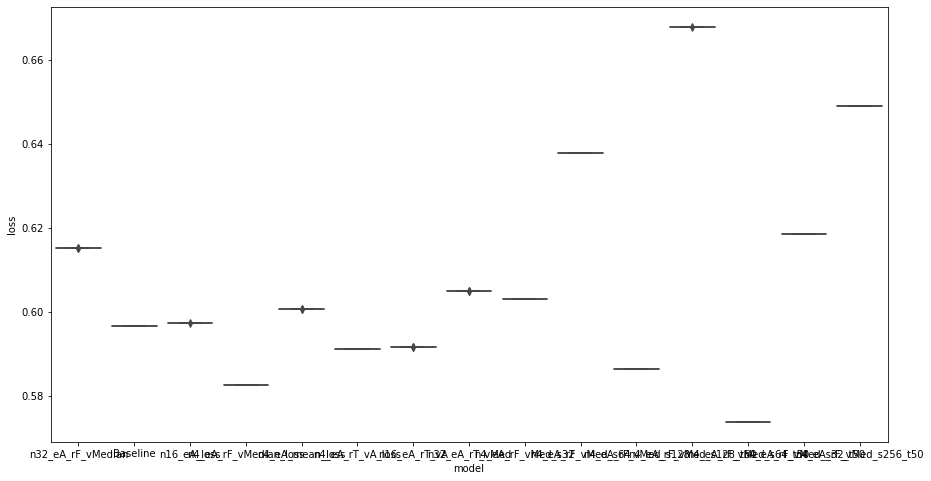

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))

sns.boxplot(data=df, x="model", y="loss")

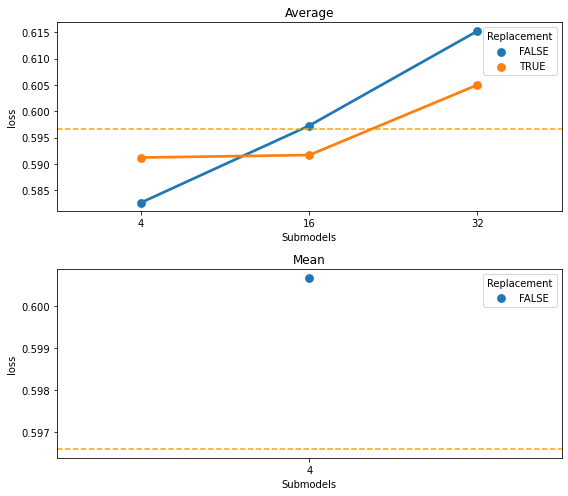

In [5]:
df1 = df.query('Sessions == 256 and Trials == 200 and Voting == "median" and Ensemble == "average" ')
#or model == "Baseline

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,7))

baseline_acc = df.query('model == "Baseline"').loss.mean()        
ax[0].axhline(baseline_acc, ls='--', color="orange")

sns.pointplot(
        data=df1, 
        x="Submodels", 
        y="loss", 
        hue="Replacement",
        errorbar="sd",
        ax=ax[0]
        )
ax[0].set_title("Average")


ax[1].axhline(baseline_acc, ls='--', color="orange")

df2 = df.query('Sessions == 256 and Trials == 200 and Voting == "mean" and Ensemble == "average" ')
sns.pointplot(
        data=df2, 
        x="Submodels", 
        y="loss", 
        hue="Replacement",
        errorbar="sd",
        ax=ax[1]
        )
ax[1].set_title("Mean")

plt.tight_layout()
plt.show()

# facet by vote and average

Text(0.5, 1.0, 'Trials = 100 | Voting = Median')

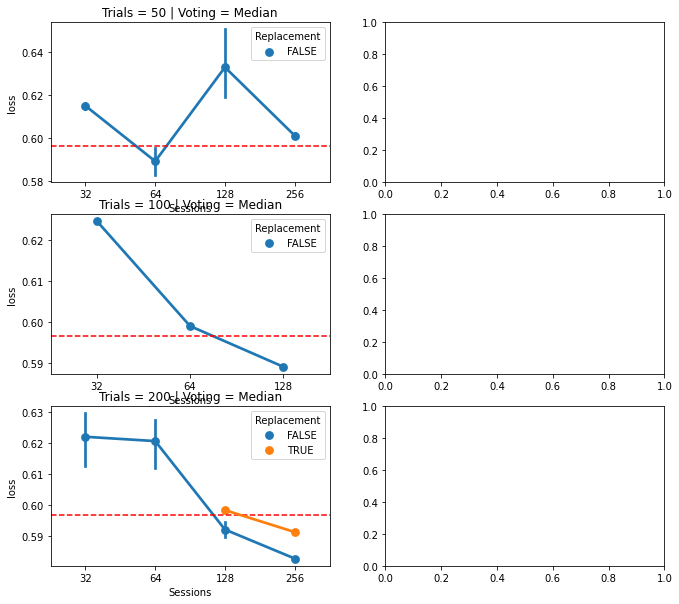

In [7]:


df1 = df.query('Trials == 200 and Voting == "median" and Ensemble == "average" and Submodels == 4')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(11,10))


ax[2][0].axhline(baseline_acc, ls='--', color="red")

sns.pointplot(
        data=df1, 
        x="Sessions", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax = ax[2][0]
        )

ax[2][0].set_title("Trials = 200 | Voting = Median")


df2 = df.query('Trials == 50 and Voting == "median" and Ensemble == "average" and Submodels == 4')

ax[0][0].axhline(baseline_acc, ls='--', color="red")

sns.pointplot(
        data=df2, 
        x="Sessions", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax = ax[0][0]
        )
ax[0][0].set_title("Trials = 50 | Voting = Median")
        


# TODO: add 100
df3 = df.query('Trials == 100 and Voting == "median" and Ensemble == "average" and Submodels == 4')

ax[1][0].axhline(baseline_acc, ls='--', color="red")

sns.pointplot(
        data=df3, 
        x="Sessions", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax = ax[1][0]
        )
ax[1][0].set_title("Trials = 100 | Voting = Median")
        



In [ ]:


df4 = df.query('Trials == 200 and Voting == "mean" and Ensemble == "average" and Submodels == 4')

ax[2][1].axhline(baseline_acc, ls='--', color="red")

sns.pointplot(
        data=df4, 
        x="Sessions", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax = ax[2][1]
        )

ax[2][1].set_title("Trials = 200")



df5 = df.query('Trials == 50 and Voting == "mean" and Ensemble == "average" and Submodels == 4')

ax[0][1].axhline(baseline_acc, ls='--', color="red")

sns.pointplot(
        data=df5, 
        x="Sessions", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax = ax[0][1]
        )
ax[0][1].set_title("Trials = 50")
        


# TODO: add 100
df3 = df.query('Trials == 100 and Voting == "mean" and Ensemble == "average" and Submodels == 4')

ax[1][1].axhline(baseline_acc, ls='--', color="red")

sns.pointplot(
        data=df6, 
        x="Sessions", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax = ax[1][1]
        )
ax[1][1].set_title("Trials = 100")


#plt.title("Submodels = 4")

plt.tight_layout()
plt.show()


ValueError: min() arg is an empty sequence

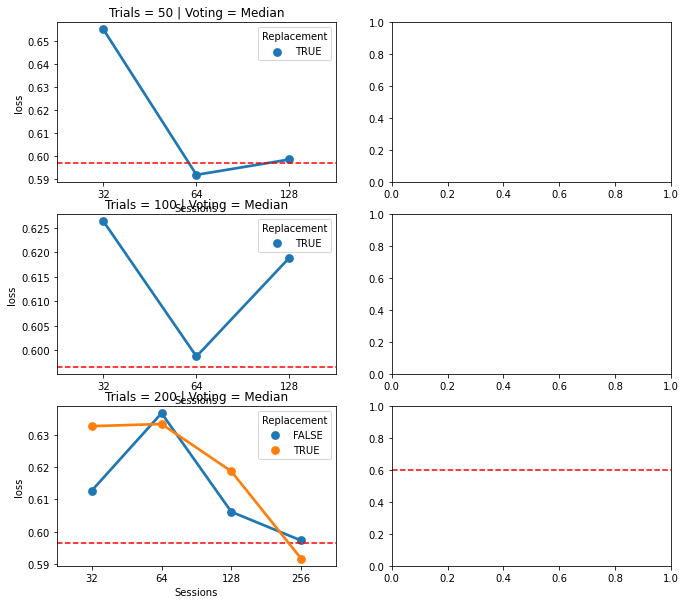

In [15]:


df1 = df.query('Trials == 200 and Voting == "median" and Ensemble == "average" and Submodels == 16')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(11,10))


ax[2][0].axhline(baseline_acc, ls='--', color="red")

sns.pointplot(
        data=df1, 
        x="Sessions", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax = ax[2][0]
        )

ax[2][0].set_title("Trials = 200 | Voting = Median")


df2 = df.query('Trials == 50 and Voting == "median" and Ensemble == "average" and Submodels == 16')

ax[0][0].axhline(baseline_acc, ls='--', color="red")

sns.pointplot(
        data=df2, 
        x="Sessions", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax = ax[0][0]
        )
ax[0][0].set_title("Trials = 50 | Voting = Median")
        


# TODO: add 100
df3 = df.query('Trials == 100 and Voting == "median" and Ensemble == "average" and Submodels == 16')

ax[1][0].axhline(baseline_acc, ls='--', color="red")

sns.pointplot(
        data=df3, 
        x="Sessions", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax = ax[1][0]
        )
ax[1][0].set_title("Trials = 100 | Voting = Median")



df4 = df.query('Trials == 200 and Voting == "mean" and Ensemble == "average" and Submodels == 16')

ax[2][1].axhline(baseline_acc, ls='--', color="red")

sns.pointplot(
        data=df4, 
        x="Sessions", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax = ax[2][1]
        )

ax[2][1].set_title("Trials = 200")



df5 = df.query('Trials == 50 and Voting == "mean" and Ensemble == "average" and Submodels == 16')

ax[0][1].axhline(baseline_acc, ls='--', color="red")

sns.pointplot(
        data=df5, 
        x="Sessions", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax = ax[0][1]
        )
ax[0][1].set_title("Trials = 50")
        


# TODO: add 100
df3 = df.query('Trials == 100 and Voting == "mean" and Ensemble == "average" and Submodels == 16')

ax[1][1].axhline(baseline_acc, ls='--', color="red")

sns.pointplot(
        data=df6, 
        x="Sessions", 
        y="loss", 
        hue="Replacement",
        #errorbar="sd",
        ax = ax[1][1]
        )
ax[1][1].set_title("Trials = 100")


#plt.title("Submodels = 4")

plt.tight_layout()
plt.show()    


In [ ]:
# TODO add 32 and 64